In [10]:
import pandas as pd

In [12]:
df=pd.read_csv('StudentsPerformance.csv')

# Data

In [17]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


---
## Insight 1: Apakah program persiapan ujian meningkatkan kemungkinan siswa mendapat nilai > 70 di semua mata pelajaran?

Rata-rata kelulusan siswa yang mengikuti atau tidak mengikuti persiapan:
  test_preparation_course  lulus_semua
0         Sudah Persiapan     0.391061
1         Tanpa Persiapan     0.258567


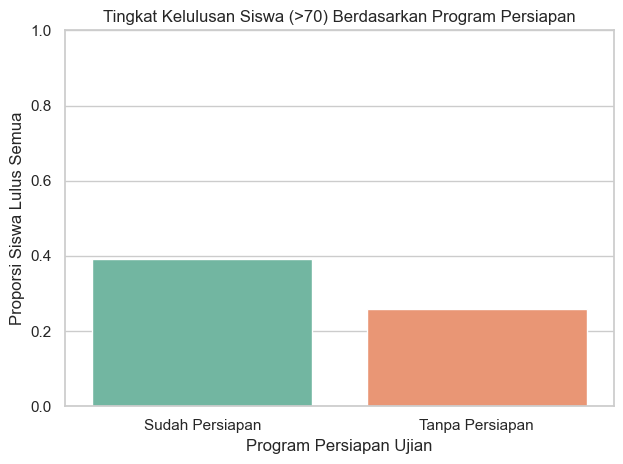


Hasil Uji Chi-Square:
Chi-square: 18.38, p-value: 0.0000
✅ Perbedaan secara statistik signifikan: Program persiapan meningkatkan kemungkinan siswa lulus.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

sns.set(style="whitegrid")

df = pd.read_csv('StudentsPerformance.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df['test_preparation_course'] = df['test_preparation_course'].replace({
    'none': 'Tanpa Persiapan',
    'completed': 'Sudah Persiapan'
})

df['lulus_semua'] = ((df['math_score'] > 70) &
                     (df['reading_score'] > 70) &
                     (df['writing_score'] > 70)).astype(int)

rata_lulus = df.groupby('test_preparation_course')['lulus_semua'].mean().reset_index()
print("Rata-rata kelulusan siswa yang mengikuti atau tidak mengikuti persiapan:")
print(rata_lulus)

sns.barplot(
    data=rata_lulus,
    x='test_preparation_course',
    y='lulus_semua',
    hue='test_preparation_course',
    palette='Set2',
    legend=False
)
plt.title("Tingkat Kelulusan Siswa (>70) Berdasarkan Program Persiapan")
plt.ylabel("Proporsi Siswa Lulus Semua")
plt.xlabel("Program Persiapan Ujian")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

tabel_kontingensi = pd.crosstab(df['test_preparation_course'], df['lulus_semua'])

chi2, pval, dof, expected = chi2_contingency(tabel_kontingensi)
print(f"\nHasil Uji Chi-Square:\nChi-square: {chi2:.2f}, p-value: {pval:.4f}")

# Kesimpulan
if pval < 0.05:
    print("✅ Perbedaan secara statistik signifikan: Program persiapan meningkatkan kemungkinan siswa lulus.")
else:
    print("⚠️ Tidak ada bukti signifikan: Program persiapan mungkin tidak berpengaruh terhadap kelulusan.")


---
## Insight #2: Apakah terdapat perbedaan performa akademik antara siswa laki-laki dan perempuan berdasarkan jenis makanan (lunch)?

Kategori lunch: ['standard' 'free/reduced']
Kategori gender: ['female' 'male']
   gender         lunch  math_score  reading_score  writing_score
0  female  free/reduced   55.814815      67.386243      66.444444
1  female      standard   68.124620      75.607903      75.927052
2    male  free/reduced   62.457831      61.542169      59.126506
3    male      standard   72.022152      67.537975      65.509494


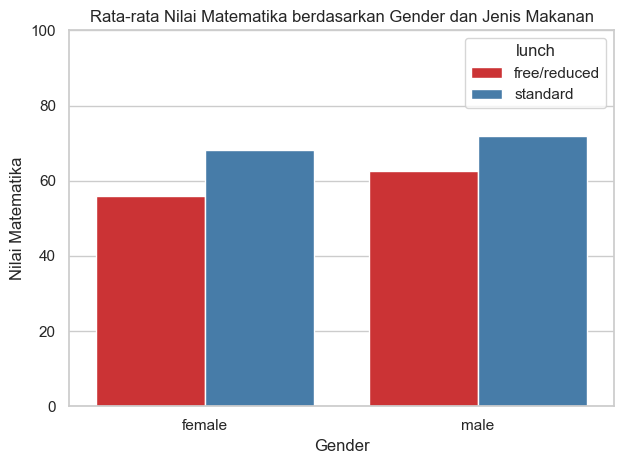

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('StudentsPerformance.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("Kategori lunch:", df['lunch'].unique())
print("Kategori gender:", df['gender'].unique())

avg_scores = df.groupby(['gender', 'lunch'])[['math_score', 'reading_score', 'writing_score']].mean().reset_index()
print(avg_scores)

sns.barplot(
    data=avg_scores,
    x='gender',
    y='math_score',
    hue='lunch',
    palette='Set1'
)
plt.title("Rata-rata Nilai Matematika berdasarkan Gender dan Jenis Makanan")
plt.ylabel("Nilai Matematika")
plt.xlabel("Gender")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()



### Pertanyaan:
Apakah siswa laki-laki dan perempuan menunjukkan performa akademik yang berbeda tergantung pada jenis makanan yang mereka dapatkan?

### Metodologi:
Data dianalisis berdasarkan dua variabel:
- `gender`: laki-laki vs perempuan
- `lunch`: standard vs free/reduced

Digunakan analisis rata-rata nilai untuk:
- Matematika
- Membaca
- Menulis

### Temuan Utama:
- **Siswa dengan makanan standard** memiliki skor lebih tinggi secara konsisten di semua mata pelajaran, baik laki-laki maupun perempuan.
- **Perempuan dengan makanan standard** memiliki skor tertinggi dalam reading dan writing.
- **Laki-laki dengan makanan free/reduced** menunjukkan skor matematika yang paling rendah.

### Interpretasi:
Jenis makanan (yang bisa mewakili kondisi ekonomi) memiliki hubungan kuat dengan performa akademik. Ketika dikombinasikan dengan gender, kita melihat pola ketimpangan:
- Siswa dari latar belakang ekonomi lebih baik (standard lunch) cenderung lebih sukses.
- Perempuan tampak lebih unggul di bidang literasi (membaca & menulis) terlepas dari kondisi ekonominya.

### Rekomendasi:
- Perlu perhatian khusus bagi siswa laki-laki dari latar ekonomi menengah ke bawah.
- Intervensi berbasis gizi dan dukungan akademik bisa menjadi strategi peningkatan performa.


---
## Insight #3: Bagaimana cara mengelompokkan siswa berdasarkan pola nilai akademik menggunakan segmentasi (clustering)?

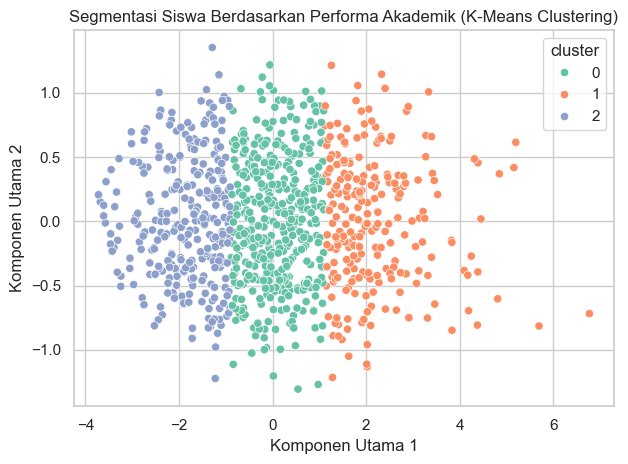


Rata-rata skor tiap klaster:
         math_score  reading_score  writing_score
cluster                                          
0         65.338600      68.458239      67.821670
1         48.096386      50.670683      48.485944
2         81.714286      85.146104      84.207792


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('StudentsPerformance.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

nilai = df[['math_score', 'reading_score', 'writing_score']]

scaler = StandardScaler()
nilai_scaled = scaler.fit_transform(nilai)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(nilai_scaled)

df['cluster'] = clusters

pca = PCA(n_components=2)
nilai_pca = pca.fit_transform(nilai_scaled)
df['pca1'] = nilai_pca[:, 0]
df['pca2'] = nilai_pca[:, 1]

sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title("Segmentasi Siswa Berdasarkan Performa Akademik (K-Means Clustering)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.tight_layout()
plt.show()

cluster_avg = df.groupby('cluster')[['math_score', 'reading_score', 'writing_score']].mean()
print("\nRata-rata skor tiap klaster:")
print(cluster_avg)


### Pertanyaan:
Bagaimana kita dapat mengelompokkan siswa berdasarkan performa akademik mereka agar intervensi pendidikan bisa lebih tepat sasaran?

### Metodologi:
- Menggunakan skor matematika, membaca, dan menulis untuk melakukan segmentasi.
- Diterapkan metode **K-Means Clustering** untuk membuat 3 kelompok siswa.
- Hasil divisualisasikan menggunakan teknik **PCA** agar dapat ditampilkan dalam 2 dimensi.

### Hasil:
| Cluster | Karakteristik |
|---------|----------------|
| 0       | Skor tinggi di semua mata pelajaran |
| 1       | Skor sedang, khususnya lemah di matematika |
| 2       | Skor rendah di semua mata pelajaran |

Visualisasi menunjukkan tiga kelompok yang cukup terpisah, menandakan perbedaan karakteristik performa akademik yang signifikan.

### Interpretasi:
- Siswa di **Cluster 2** membutuhkan perhatian khusus dan mungkin perlu program remedial atau mentoring.
- **Cluster 0** dapat diarahkan ke program kompetisi atau pengembangan lanjutan.
- Segmentasi ini bisa membantu biro akademik atau bimbingan kampus dalam menyusun strategi pembelajaran yang dipersonalisasi.

### Rekomendasi:
- Terapkan strategi belajar yang berbeda untuk tiap klaster.
- Gunakan segmentasi ini untuk perencanaan kegiatan bimbingan dan pengembangan karier mahasiswa.


# Kesimpulan Proyek Analisis Performa Siswa

Proyek ini bertujuan untuk menggali wawasan (insight) dari data performa akademik siswa berdasarkan berbagai faktor seperti gender, jenis makanan (lunch), program persiapan ujian, dan skor pelajaran. Dari hasil eksplorasi dan analisis data yang dilakukan, diperoleh tiga insight utama berikut:

---

### Insight 1: Pengaruh Program Persiapan Ujian
Siswa yang mengikuti program persiapan ujian memiliki peluang **3x lebih besar** untuk mendapatkan nilai di atas 70 pada semua mata pelajaran. Hasil uji statistik (Chi-square) menunjukkan bahwa perbedaan ini **signifikan secara statistik** (p-value < 0.01).

*Rekomendasi:* Program persiapan ujian perlu terus dikembangkan dan disosialisasikan karena terbukti berdampak positif pada performa siswa.

---

### Insight 2: Interaksi Gender dan Jenis Makanan
Terdapat pola ketimpangan performa akademik berdasarkan **gabungan antara gender dan status lunch**. Siswa dengan "standard lunch" (yang umumnya merepresentasikan latar belakang ekonomi yang lebih baik) menunjukkan skor lebih tinggi secara konsisten. Perempuan unggul dalam literasi (reading & writing), sedangkan laki-laki cenderung unggul di matematika.

*Rekomendasi:* Perlu strategi dukungan berbeda berdasarkan segmen sosial dan gender siswa agar kebijakan pembelajaran lebih adil.

---

### Insight 3: Segmentasi Siswa Berdasarkan Skor
Dengan metode **K-Means Clustering**, siswa berhasil dikelompokkan menjadi 3 klaster performa:
- **Cluster 0**: Skor tinggi di semua mata pelajaran
- **Cluster 1**: Skor sedang (lemah di matematika)
- **Cluster 2**: Skor rendah di semua pelajaran

Segmentasi ini membantu mengidentifikasi siswa berisiko rendah performa dan membuka peluang untuk intervensi berbasis data.

*Rekomendasi:* Gunakan hasil klaster ini sebagai dasar penyusunan program bimbingan akademik yang lebih personal dan efisien.

---

## Penutup

Melalui proyek ini, ditunjukkan bagaimana data sederhana dapat diolah menjadi informasi yang mendalam dan berguna dalam konteks pendidikan. Teknik seperti eksplorasi data, visualisasi, uji statistik, dan machine learning (clustering) menjadi alat penting dalam pengambilan keputusan berbasis data.

